In [2]:
pip install geopandas

     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 6.6MB 16.2MB/s 
     |████████████████████████████████| 15.3MB 238kB/s 


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests
import shapely
import matplotlib.pyplot as plt
import datetime
import os
import math
import random
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

%matplotlib inline

In [21]:
travel_times= pd.read_csv('kolkata-wards-2020-1-All-DatesByHourBucketsAggregate.csv')
travel_times = travel_times.convert_dtypes()



In [22]:
travel_times

,sourceid,dstid,month,day,start_hour,end_hour,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,74,22,1,25,10,16,777.81,305.18,733.53,1.38
1,33,99,1,22,19,0,3181.71,726.74,3104.37,1.25
2,38,89,1,18,0,7,1065.40,366.29,1027.75,1.27
3,39,79,2,8,0,7,1278.38,307.07,1245.63,1.25
4,88,126,1,2,19,0,1312.86,317.76,1280.09,1.24
...,...,...,...,...,...,...,...,...,...,...
4462044,100,109,2,16,10,16,1434.77,333.34,1403.01,1.23
4462045,74,86,3,2,10,16,643.95,285.60,603.45,1.40
4462046,121,44,3,10,10,16,970.23,254.41,937.70,1.30
4462047,132,78,2,29,10,16,789.25,330.02,735.07,1.44


In [19]:
wards = gpd.read_file('kolkata_wards.json')

In [20]:
wards

,WARD,MOVEMENT_ID,DISPLAY_NAME,geometry
0,93,1,Ward 93,"MULTIPOLYGON (((88.35296 22.50168, 88.35300 22..."
1,61,2,Ward 61,"MULTIPOLYGON (((88.35655 22.55349, 88.35656 22..."
2,86,3,Ward 86,"MULTIPOLYGON (((88.35978 22.52516, 88.35979 22..."
3,90,4,Ward 90,"MULTIPOLYGON (((88.37161 22.51538, 88.37161 22..."
4,26,5,Ward 26,"MULTIPOLYGON (((88.35878 22.58862, 88.35882 22..."
...,...,...,...,...
136,35,137,Ward 35,"MULTIPOLYGON (((88.37763 22.57034, 88.37826 22..."
137,116,138,Ward 116,"MULTIPOLYGON (((88.32589 22.49510, 88.32589 22..."
138,95,139,Ward 95,"MULTIPOLYGON (((88.35105 22.48683, 88.35108 22..."
139,30,140,Ward 30,"MULTIPOLYGON (((88.38150 22.57798, 88.38152 22..."


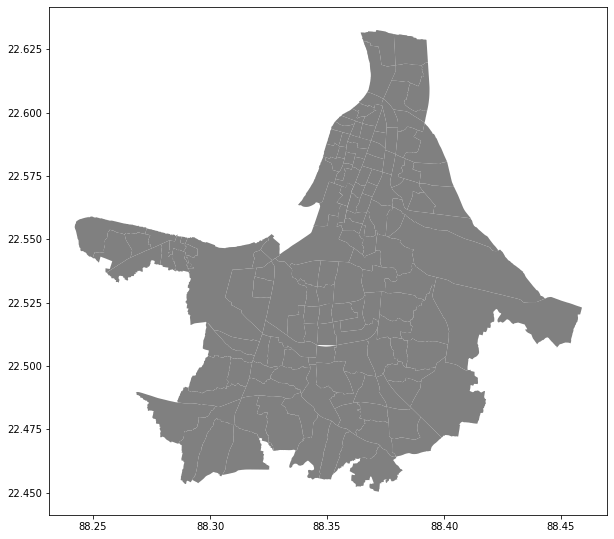

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
wards['geometry'].plot(color='grey',ax=ax)

In [24]:
categories_to_hour = {
    1: [0, 6],
    2: [7, 9],
    3: [10, 15],
    4: [16, 18],
    5: [19, 23]
}

def get_time_period(hour):
    for category, (start_hour, end_hour) in categories_to_hour.items():
        if hour >= start_hour and hour <= end_hour:
            return category

In [25]:
travel_times['time_period'] = travel_times['start_hour'].apply(get_time_period)

In [26]:
year = 2020

def get_dow(row):
    return datetime.date(year, row['month'], row['day']).weekday()

In [27]:
travel_times['dow'] = travel_times.apply(get_dow, axis=1)

In [28]:
travel_times

,sourceid,dstid,month,day,start_hour,end_hour,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,time_period,dow
0,74,22,1,25,10,16,777.81,305.18,733.53,1.38,3,5
1,33,99,1,22,19,0,3181.71,726.74,3104.37,1.25,5,2
2,38,89,1,18,0,7,1065.40,366.29,1027.75,1.27,1,5
3,39,79,2,8,0,7,1278.38,307.07,1245.63,1.25,1,5
4,88,126,1,2,19,0,1312.86,317.76,1280.09,1.24,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4462044,100,109,2,16,10,16,1434.77,333.34,1403.01,1.23,3,6
4462045,74,86,3,2,10,16,643.95,285.60,603.45,1.40,3,0
4462046,121,44,3,10,10,16,970.23,254.41,937.70,1.30,3,1
4462047,132,78,2,29,10,16,789.25,330.02,735.07,1.44,3,5


In [29]:
centroid_utm = wards.geometry.to_crs('EPSG:32643').centroid
wards['centroid'] = centroid_utm.to_crs('EPSG:4326')

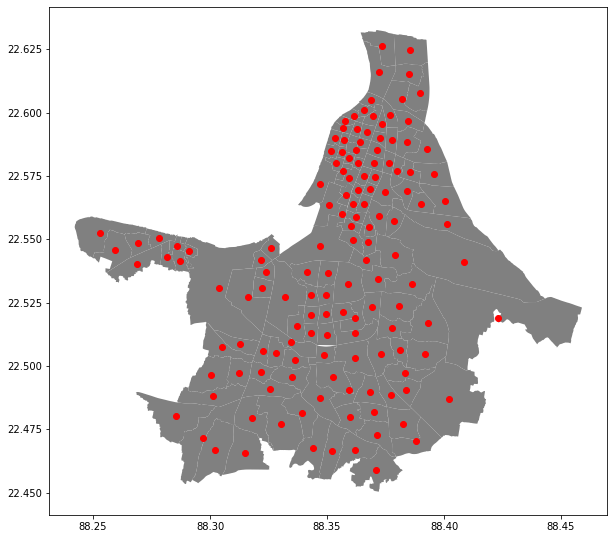

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
wards['geometry'].plot(color='grey',ax=ax)
wards['centroid'].plot(color='red',ax=ax)